# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #Fahrenheit

#build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat=[]
lng=[]
temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
index=[]
country=[]
date=[]
ind=1
list_ind=1
set_ind=1
cities_new=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])
        index.append(ind)
        cities_new.append(city)
        print(f"Processing Record {list_ind} of Set {set_ind} | {city}")

    except:
        print("City not found. Skipping...")
        next

    ind+=1
    if list_ind==50:
        set_ind+=1
        list_ind=1
    else:
        list_ind+=1



Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | monywa
City not found. Skipping...
City not found. Skipping...
Processing Record 5 of Set 1 | meulaboh
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | fenelon falls
City not found. Skipping...
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | bowen
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | hilo
City not found. Skipping...
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | pasni
Processing Record 22 of Set 1 | cockburn town
Processing Record 23 of Set 1 | cherskiy
Processing Record 24 of Set 1 | longyearbyen
Processing Record 25 of Se

Processing Record 10 of Set 5 | tuktoyaktuk
Processing Record 11 of Set 5 | xihua
Processing Record 12 of Set 5 | te anau
Processing Record 13 of Set 5 | iqaluit
Processing Record 14 of Set 5 | karpogory
Processing Record 15 of Set 5 | fortuna
Processing Record 16 of Set 5 | saveh
Processing Record 17 of Set 5 | el alto
Processing Record 18 of Set 5 | portland
City not found. Skipping...
Processing Record 20 of Set 5 | san pedro
Processing Record 21 of Set 5 | okhotsk
Processing Record 22 of Set 5 | wichita
Processing Record 23 of Set 5 | lac du bonnet
Processing Record 24 of Set 5 | hay river
Processing Record 25 of Set 5 | mariental
Processing Record 26 of Set 5 | torbay
Processing Record 27 of Set 5 | faanui
Processing Record 28 of Set 5 | eirunepe
Processing Record 29 of Set 5 | upernavik
Processing Record 30 of Set 5 | champoton
Processing Record 31 of Set 5 | bonito
Processing Record 32 of Set 5 | kiunga
Processing Record 33 of Set 5 | henties bay
Processing Record 34 of Set 5 | 

Processing Record 14 of Set 9 | bronnoysund
Processing Record 15 of Set 9 | mapimi
Processing Record 16 of Set 9 | humberto de campos
Processing Record 17 of Set 9 | gillette
Processing Record 18 of Set 9 | samarai
Processing Record 19 of Set 9 | constitucion
Processing Record 20 of Set 9 | hervey bay
City not found. Skipping...
Processing Record 22 of Set 9 | keti bandar
Processing Record 23 of Set 9 | izhma
Processing Record 24 of Set 9 | plettenberg bay
Processing Record 25 of Set 9 | emerald
Processing Record 26 of Set 9 | arawa
Processing Record 27 of Set 9 | westport
Processing Record 28 of Set 9 | tungor
Processing Record 29 of Set 9 | veinticinco de mayo
Processing Record 30 of Set 9 | neuquen
Processing Record 31 of Set 9 | paracuru
Processing Record 32 of Set 9 | leningradskiy
Processing Record 33 of Set 9 | chara
Processing Record 34 of Set 9 | avera
Processing Record 35 of Set 9 | oranjestad
City not found. Skipping...
Processing Record 37 of Set 9 | hargeysa
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data={'City':cities_new,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity,'Lat':lat,'Lng':lng,'Max Temp':temp,'Wind Speed':wind_speed}
weather_df=pd.DataFrame.from_dict(data)
weather_df.to_csv("city_weather.csv", encoding="utf-8", index=False)
weather_df.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [5]:
weather_df = weather_df[weather_df['Humidity'] <=100]
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,0,AU,1548802498,100,-33.64,115.35,60.94,16.71
1,monywa,0,MM,1548802498,97,22.12,95.13,59.41,6.87
2,meulaboh,44,ID,1548802499,100,4.14,96.13,77.54,4.41
3,mataura,20,NZ,1548802499,69,-46.19,168.86,78.75,13.13
4,tasiilaq,8,GL,1548798600,72,65.61,-37.64,10.40,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

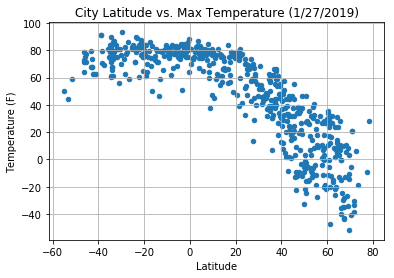

In [8]:
lat_temp=weather_df.plot.scatter(x='Lat', y='Max Temp',grid=True,title='City Latitude vs. Max Temperature (1/27/2019)')
lat_temp.set_xlabel('Latitude')
lat_temp.set_ylabel('Temperature (F)')

plt.savefig('latitude_v_temp.png')

#### Latitude vs. Humidity Plot

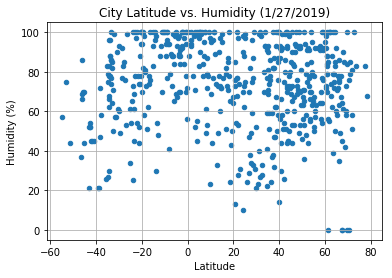

In [9]:
lat_hum=weather_df.plot.scatter(x='Lat', y='Humidity',grid=True,title='City Latitude vs. Humidity (1/27/2019)')
lat_hum.set_xlabel('Latitude')
lat_hum.set_ylabel('Humidity (%)')

plt.savefig('latitude_v_humidity.png')

#### Latitude vs. Cloudiness Plot

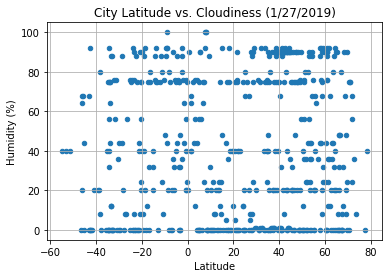

In [10]:
lat_cloud=weather_df.plot.scatter(x='Lat', y='Cloudiness',grid=True,title='City Latitude vs. Cloudiness (1/27/2019)')
lat_cloud.set_xlabel('Latitude')
lat_cloud.set_ylabel('Humidity (%)')

plt.savefig('latitude_v_cloudiness.png')

#### Latitude vs. Wind Speed Plot

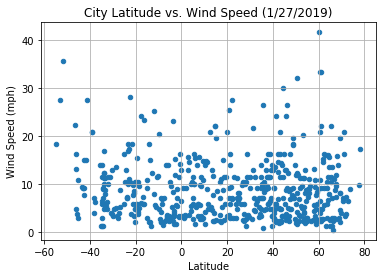

In [11]:
lat_wind=weather_df.plot.scatter(x='Lat', y='Wind Speed',grid=True,title='City Latitude vs. Wind Speed (1/27/2019)')
lat_wind.set_xlabel('Latitude')
lat_wind.set_ylabel('Wind Speed (mph)')

plt.savefig('latitude_v_windspeed.png')